# 你的第一个卷积神经网络
## 导入

In [2]:
import numpy as np
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

## 数据

In [3]:
NUM_CLASSES = 10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (10000, 10))

## 网络结构

In [4]:
input_layer = Input(shape=(32, 32, 3))
conv_layer_1 = Conv2D(filters=10, kernel_size=(4, 4), strides=2, padding="same")(input_layer)
conv_layer_2 = Conv2D(filters=20, kernel_size=(3, 3), strides=2, padding="same")(conv_layer_1)
flatten_layer = Flatten()(conv_layer_2)
output_layer = Dense(units=10, activation="softmax")(flatten_layer)

model = Model(input_layer, output_layer)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 16, 16, 10)        490       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 20)          1820      
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                12810     
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


In [5]:
input_layer = Input((32, 32, 3))
conv1 = Conv2D(filters=32, kernel_size=3, strides=1, padding="same")(input_layer)
conv1 = BatchNormalization()(conv1)
conv1 = LeakyReLU()(conv1)
conv2 = Conv2D(filters=32, kernel_size=3, strides=2, padding="same")(conv1)
conv2 = BatchNormalization()(conv2)
conv2 = LeakyReLU()(conv2)
conv3 = Conv2D(filters=64, kernel_size=3, strides=1, padding="same")(conv2)
conv3 = BatchNormalization()(conv3)
conv3 = LeakyReLU()(conv3)
conv4 = Conv2D(filters=64, kernel_size=3, strides=2, padding="same")(conv3)
conv4 = BatchNormalization()(conv4)
conv4 = LeakyReLU()(conv4)
flatten_layer = Flatten()(conv4)
dense1 = Dense(128)(flatten_layer)
dense1 = BatchNormalization()(dense1)
dense1 = LeakyReLU()(dense1)
dense1 = Dropout(rate=0.5)(dense1)
dense2 = Dense(NUM_CLASSES)(dense1)
output_layer = Activation("softmax")(dense2)

model = Model(input_layer, output_layer)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 32)        0   

## 训练

In [6]:
opt = Adam(lr=0.0005)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 44s 20ms/step - loss: 1.7635 - accuracy: 0.3955 - val_loss: 1.2324 - val_accuracy: 0.5566
Epoch 2/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.1454 - accuracy: 0.5983 - val_loss: 0.9754 - val_accuracy: 0.6564
Epoch 3/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.9851 - accuracy: 0.6545 - val_loss: 0.9333 - val_accuracy: 0.67356  - ETA: 2s - loss: 0.9863 -  - ETA: 0s - loss: 0.9853 - accura - ETA: 0s - loss: 0.9852 - accuracy: 
Epoch 4/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.8879 - accuracy: 0.6932 - val_loss: 0.8856 - val_accuracy: 0.6896
Epoch 5/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.8270 - accuracy: 0.7132 - val_loss: 0.8469 - val_accuracy: 0.7014TA: 25s - loss:  - ETA: 23s - loss: 0.7990 - a - ETA: 22s - loss: 0
Epoch 6/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.7790 - accuracy: 0.73

## 分析

In [7]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.7759 - accuracy: 0.7300


[0.7758650183677673, 0.7300000190734863]

In [8]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

(0.0, 1.0, 0.0, 1.0)

Text(0.5, -0.35, 'pred=dog')

Text(0.5, -0.7, 'act=deer')

(0.0, 1.0, 0.0, 1.0)

Text(0.5, -0.35, 'pred=deer')

Text(0.5, -0.7, 'act=deer')

(0.0, 1.0, 0.0, 1.0)

Text(0.5, -0.35, 'pred=truck')

Text(0.5, -0.7, 'act=truck')

(0.0, 1.0, 0.0, 1.0)

Text(0.5, -0.35, 'pred=bird')

Text(0.5, -0.7, 'act=bird')

(0.0, 1.0, 0.0, 1.0)

Text(0.5, -0.35, 'pred=airplane')

Text(0.5, -0.7, 'act=airplane')

(0.0, 1.0, 0.0, 1.0)

Text(0.5, -0.35, 'pred=bird')

Text(0.5, -0.7, 'act=airplane')

(0.0, 1.0, 0.0, 1.0)

Text(0.5, -0.35, 'pred=horse')

Text(0.5, -0.7, 'act=horse')

(0.0, 1.0, 0.0, 1.0)

Text(0.5, -0.35, 'pred=airplane')

Text(0.5, -0.7, 'act=airplane')

(0.0, 1.0, 0.0, 1.0)

Text(0.5, -0.35, 'pred=deer')

Text(0.5, -0.7, 'act=deer')

(0.0, 1.0, 0.0, 1.0)

Text(0.5, -0.35, 'pred=airplane')

Text(0.5, -0.7, 'act=airplane')

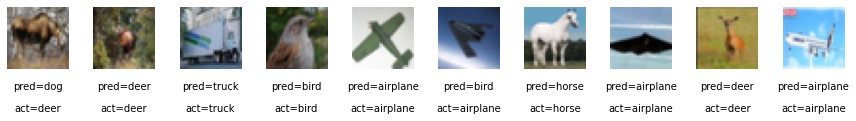

In [10]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis("off")
    ax.text(0.5, -0.35, "pred=" + str(preds_single[idx]), fontsize=10, ha="center", transform=ax.transAxes)
    ax.text(0.5, -0.7, "act=" + str(actual_single[idx]), fontsize=10, ha="center", transform=ax.transAxes)
    ax.imshow(img)